**Install all essential libraries**
* tensorflow is our general purpose ml library with all the utlities we need
* numpy has all our various data types like arrays, matrices etc.
* matplotlib for plotting and visualising the numpy array of values
* math is just for math functions and mathematical constants

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import math

**Library diagnostic information**

In [2]:
print('Numpy ' + np.__version__)
print('Tensorflow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

Numpy 1.20.0
Tensorflow 2.6.2
Keras 2.6.0


**Model Training Parameters**
* training - to train the model.
* validation - to verify and tune the model.
* test - unseen data to see the performance of the model.

In [3]:
nsamples = 1000
val_ratio = 0.2     # 20% of data is for validation
test_ratio = 0.2    # 20% of data is for testing, overall 600 samples for training
tflite_model_name = 'sine_model'
c_model_name = 'sine_model'

**generate some sample data**

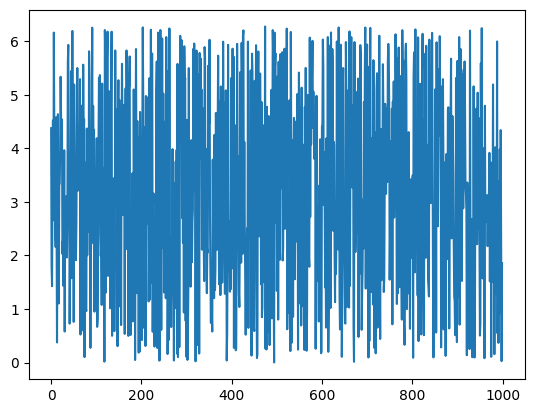

In [4]:
np.random.seed(123)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)      # this will generate uniform distribution of random ness
plt.plot(x_values)

**Obtain output samples with noise** (for estimation)

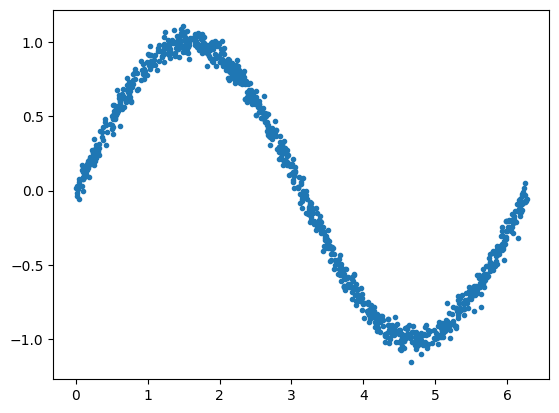

In [5]:
y_values = np.sin(x_values) + (0.05 * np.random.randn(x_values.shape[0]))    # add some noise just to make the model guess a little
plt.plot(x_values, y_values, '.')

**split the data across training, validation and test sets**

In [6]:
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

# check samples intact
assert(x_train.size + x_val.size + x_test.size == nsamples)

**show all the different data samples in the distribution**

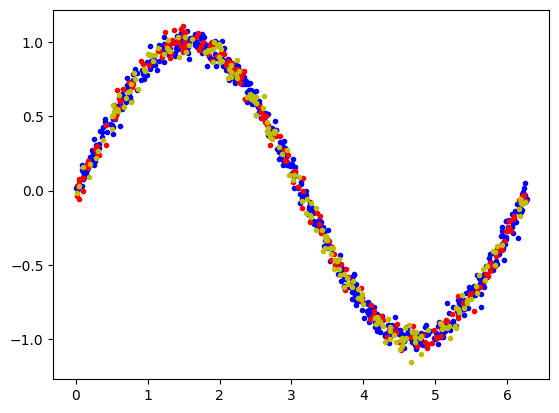

In [7]:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")

**Create the skeleton for the neural network model**

In [8]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

2023-09-22 12:39:41.570166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-22 12:39:41.589697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-22 12:39:41.589853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-22 12:39:41.590436: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 2,177
Trainable params: 2,177
Non-trainable params: 0
_________________________________________________________________


**Optimizer and Loss function and metrics**

In [10]:
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

**Train the model**

In [11]:
with tf.device('/GPU:0'):
  history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val),
                  )

2023-09-22 12:39:41.775620: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
6/6 [==============================] - 0s 17ms/step - loss: 0.6067 - mae: 0.6067 - val_loss: 0.5654 - val_mae: 0.5654
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5382 - mae: 0.5382 - val_loss: 0.5307 - val_mae: 0.5307
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5094 - mae: 0.5094 - val_loss: 0.4977 - val_mae: 0.4977
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4842 - mae: 0.4842 - val_loss: 0.4656 - val_mae: 0.4656
Epoch 5/500
1/6 [====>.........................] - ETA: 0s - loss: 0.4341 - mae: 0.4341

2023-09-22 12:39:42.038467: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


6/6 [==============================] - 0s 5ms/step - loss: 0.4543 - mae: 0.4543 - val_loss: 0.4442 - val_mae: 0.4442
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4311 - mae: 0.4311 - val_loss: 0.4108 - val_mae: 0.4108
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4026 - mae: 0.4026 - val_loss: 0.3950 - val_mae: 0.3950
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3786 - mae: 0.3786 - val_loss: 0.3586 - val_mae: 0.3586
Epoch 9/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3569 - mae: 0.3569 - val_loss: 0.3351 - val_mae: 0.3351
Epoch 10/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3352 - mae: 0.3352 - val_loss: 0.3214 - val_mae: 0.3214
Epoch 11/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3078 - mae: 0.3078 - val_loss: 0.2911 - val_mae: 0.2911
Epoch 12/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2847 - mae: 0.2847 - val_loss: 0.

**Observe training history**

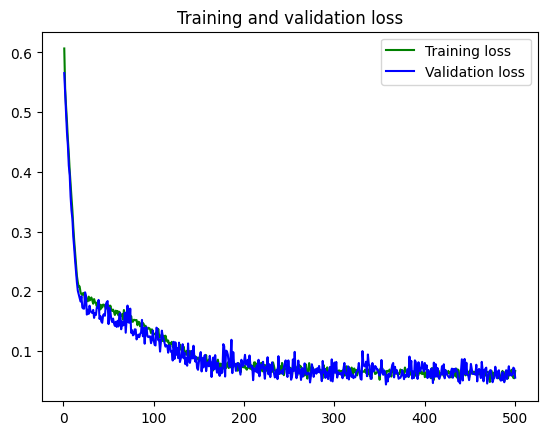

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**plot the predictions against actual values**

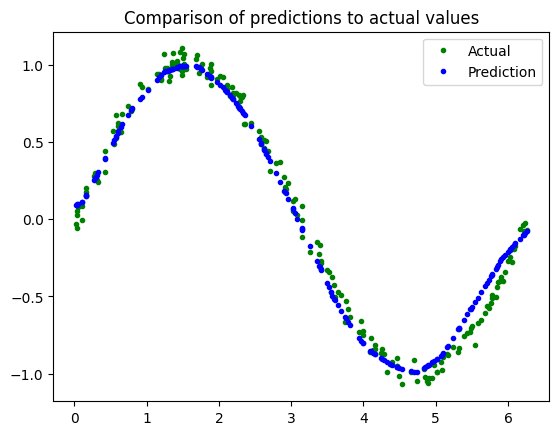

In [13]:
predictions = model.predict(x_test)

plt.clf()
plt.title('Comparison of predictions to actual values')
plt.plot(x_test, y_test, 'g.', label='Actual')
plt.plot(x_test, predictions, 'b.', label='Prediction')
plt.legend()
plt.show()

**Convert and optimize it as a tflite model**

In [14]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16] # optional
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp42uib8kf/assets


2023-09-22 12:39:53.512740: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2023-09-22 12:39:53.737438: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-22 12:39:53.737542: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2023-09-22 12:39:53.737595: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2023-09-22 12:39:53.737844: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-22 12:39:53.737924: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had ne

8224